### Install required dependencies

In [2]:
from google.colab import drive
import sys
if 'google.colab' in sys.modules:
  drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
if 'google.colab' in sys.modules:
  !pip install numpy pandas matplotlib seaborn scikit-learn tensorflow keras torch opencv-python labelme statsmodels scipy missingno
else:
  %pip install -r studio1.req.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8

### Import required libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mno
import seaborn as sns
import itertools

import os
import warnings

### Define config

In [5]:
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.7f}'.format

### Read and get data information

In [20]:
FILE_PATH = "/content/gdrive/MyDrive/Colab Notebooks/COS40007/Studio 1/water_potability.csv"
print(FILE_PATH)
raw_df = pd.read_csv(FILE_PATH)
concrete_df = raw_df.copy()
concrete_df.head()

/content/gdrive/MyDrive/Colab Notebooks/COS40007/Studio 1/water_potability.csv


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.8904555,20791.3189807,7.3002119,368.5164413,564.3086542,10.3797831,86.9909705,2.9631354,0
1,3.7160801,129.4229205,18630.0578580,6.6352459,NaN,592.8853591,15.1800131,56.3290763,4.5006563,0
2,8.0991242,224.2362594,19909.5417323,9.2758836,NaN,418.6062131,16.8686369,66.4200925,3.0559337,0
3,8.3167659,214.3733941,22018.4174408,8.0593324,356.8861356,363.2665162,18.4365245,100.3416744,4.6287705,0
4,9.0922235,181.1015092,17978.9863389,6.5466000,310.1357375,398.4108134,11.5582794,31.9979927,4.0750754,0


### Get shape of the dataset

In [21]:
concrete_df.shape

(3276, 10)

In [22]:
print("Number of rows = {0} and Number of Columns = {1} in Data frame".format(concrete_df.shape[0],concrete_df.shape[1]))

Number of rows = 3276 and Number of Columns = 10 in Data frame


### Get data type of each attribute

In [23]:
concrete_df.dtypes

,0
ph,float64
Hardness,float64
Solids,float64
Chloramines,float64
Sulfate,float64
Conductivity,float64
Organic_carbon,float64
Trihalomethanes,float64
Turbidity,float64
Potability,int64


### Check dataframe information

In [24]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### Get columns

In [25]:
COLS = [c for c in concrete_df.columns]
print(COLS)

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


## Data Cleaning

### Check outliers

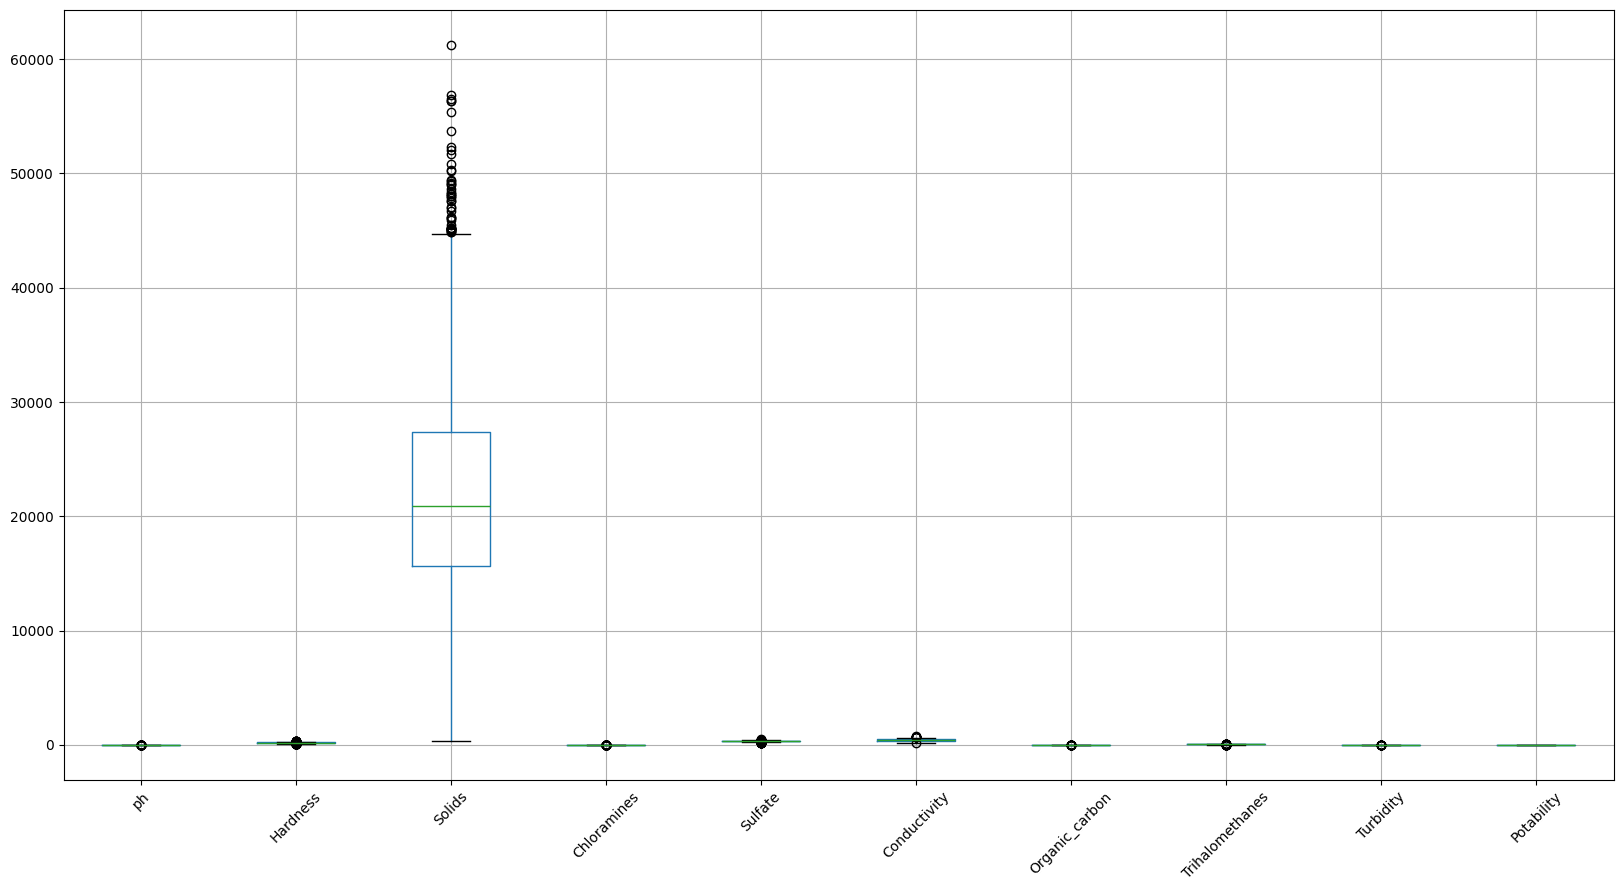

In [26]:
concrete_df.boxplot(column=COLS, rot=45, figsize=(20, 10))
plt.show()

### Quantile based outlier detection and cleaning

In [27]:
concrete_df_outliers = pd.DataFrame(concrete_df.loc[:,])
Q1 = concrete_df_outliers.quantile(0.25)
Q3 = concrete_df_outliers.quantile(0.75)
IQR = Q3 - Q1
print(IQR)



ph                    1.9689742
Hardness             39.8169183
Solids            11666.0718305
Chloramines           1.9874663
Sulfate              52.2506726
Conductivity        116.0578904
Organic_carbon        4.4918502
Trihalomethanes      21.4929373
Turbidity             1.0606089
Potability            1.0000000
dtype: float64


In [28]:

# Filter out the outliers by using IQR method, only keep the valid data
for i, j in zip(np.where(concrete_df_outliers > Q3 + 1.5 * IQR)[0], np.where(concrete_df_outliers > Q3 + 1.5 * IQR)[1]):
  whisker  = Q3 + 1.5 * IQR
  concrete_df_outliers.iloc[i,j] = whisker[j]

# Replace every outlier on the lower side by the lower whisker - for 'water' column
for i, j in zip(np.where(concrete_df_outliers < Q1 - 1.5 * IQR)[0], np.where(concrete_df_outliers < Q1 - 1.5 * IQR)[1]):
  whisker  = Q1 - 1.5 * IQR
  concrete_df_outliers.iloc[i,j] = whisker[j]

concrete_df_outliers.shape





(3276, 10)

In [29]:
# Remove outliers columns
concrete_df.drop(columns=concrete_df.loc[:,], inplace=True)


In [30]:
# Concat the cleaned data with the outliers data
concrete_df = pd.concat([concrete_df, concrete_df_outliers], axis=1)
concrete_df.shape



(3276, 10)

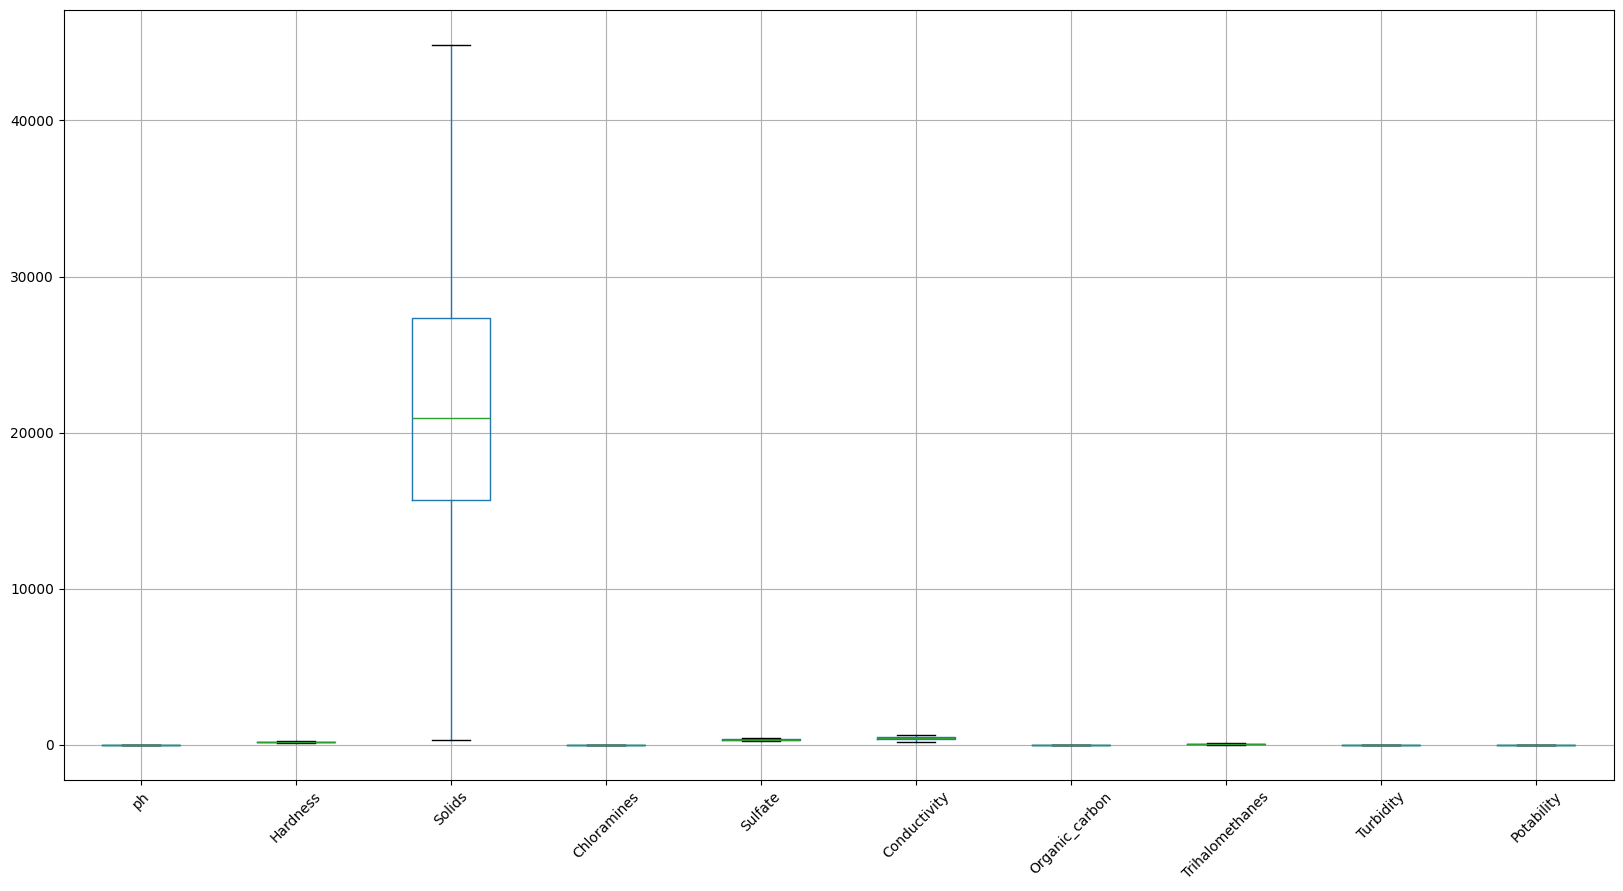

In [31]:
# Revalidate the outliers again
concrete_df.boxplot(column=COLS, rot=45, figsize=(20, 10))
plt.show()

In [32]:
# Check null
concrete_df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [33]:
# Drop null values
concrete_df.dropna(inplace=True)
concrete_df.shape


(2011, 10)

In [34]:
# Check if there are missing values

concrete_df_missval = concrete_df.copy()
isDuplicates = False

for x in concrete_df_missval.columns:
  concrete_df_missval[x] = concrete_df_missval[x].astype(str).str.replace(".", "")
  res = concrete_df_missval[x].astype(str).str.isalnum()
  if False in res.unique():
    isDuplicates = True
    print('For column "{}" unique values are {}'.format(x, concrete_df_missval[x].unique()))
    print('\n')

if isDuplicates == False:
  print("No duplicates found")
else:
  print("Duplicates found")





No duplicates found


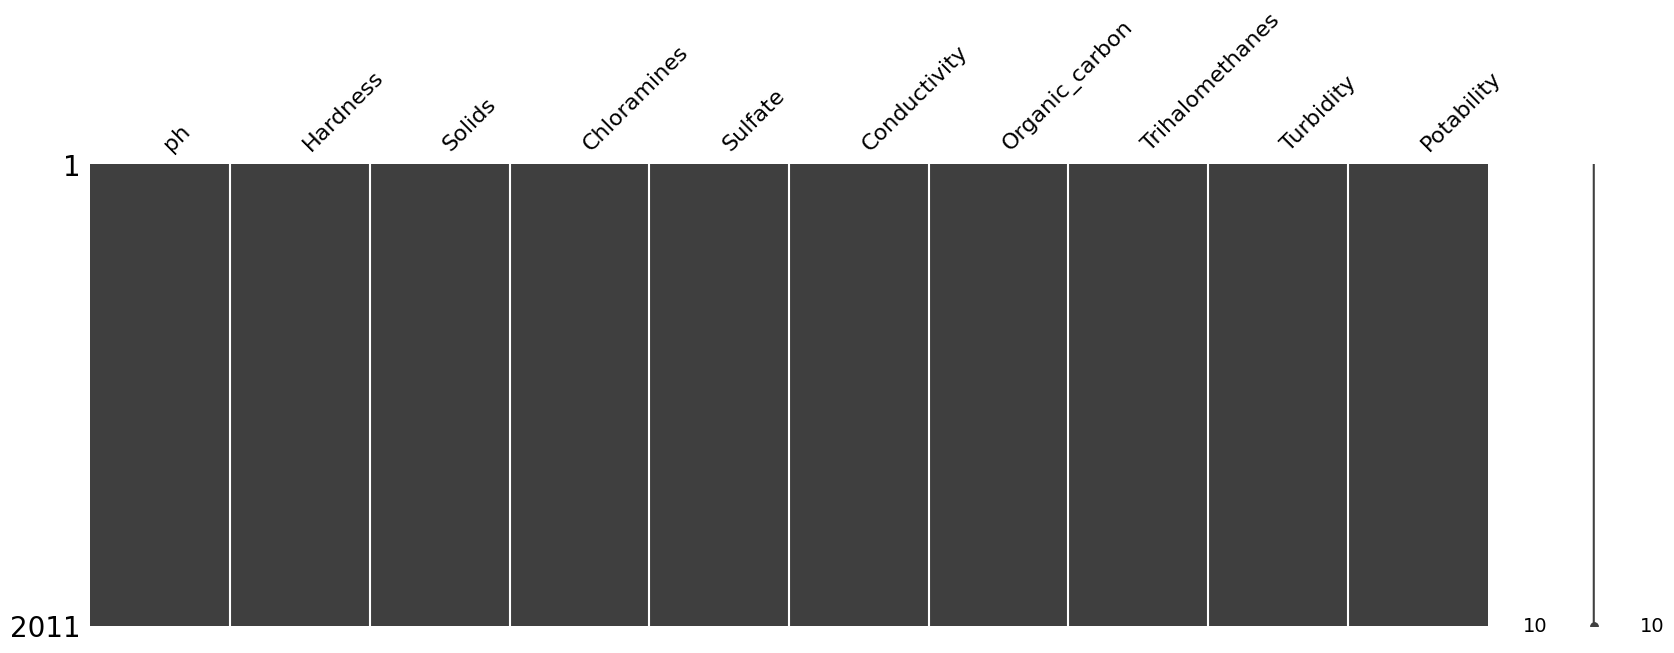

In [35]:
mno.matrix(concrete_df, figsize=(20, 6))
plt.show()

In [36]:
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2011.0000000,7.0870831,1.5341580,3.1396306,6.0897235,7.0272969,8.0529688,11.0155274
Hardness,2011.0000000,196.0591926,31.9130495,117.1251604,176.7449376,197.1918394,216.4410697,276.3928337
Solids,2011.0000000,21872.3341921,8503.0694517,320.9426113,15615.6653904,20933.5127497,27182.5870668,44831.8698731
Chloramines,2011.0000000,7.1318537,1.5475176,3.1462213,6.1388953,7.1439067,8.1097261,11.0960864
Sulfate,2011.0000000,333.3518091,40.1178020,229.3234890,307.6325115,332.2321775,359.3305546,438.3261792
Conductivity,2011.0000000,426.4186540,80.3618992,201.6197368,366.6803074,423.4559057,482.3731686,655.8791400
Organic_carbon,2011.0000000,14.3575872,3.3054206,5.3280260,12.1241049,14.3220189,16.6830493,23.2954269
Trihalomethanes,2011.0000000,66.4066699,15.9086187,23.6051297,55.9526639,66.5421980,77.2919254,109.5768788
Turbidity,2011.0000000,3.9695272,0.7759072,1.8487975,3.4429154,3.9681771,4.5141753,6.0912332
Potability,2011.0000000,0.4032819,0.4906785,0.0000000,0.0000000,0.0000000,1.0000000,1.0000000


### Check duplications

In [37]:
print("Duplicated: ",int(concrete_df.duplicated().sum()))

Duplicated:  0


In [38]:
dup = concrete_df[concrete_df.duplicated()]
dup


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


### Drop duplications if have

In [39]:
if int(concrete_df.duplicated().sum()) > 0:
  print(f"Before dropping duplications: {concrete_df.shape}")
  concrete_df.drop_duplicates(inplace=True)
  print(f"After dropping duplications: {concrete_df.shape}")

### Summary
- We had 0 duplicate instances in dataset and has dropped those duplicates.
- There are 1434 null values across 3 columns, which are 'ph', 'Sulfate' and 'Trihalomethanes'. We have dropped these null values.
- We had outliers in every columns except 'Potability', handled these outliers by replacing every outlier with upper side of the whisker.
- There are no missing values in the dataset

## EDA (Exploratory Data Analysis)

### Variable Identification
- Target Variable: 'Potability'
- Predictor Variables: 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'




### Univariate Analysis
Numerical Variables: 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'

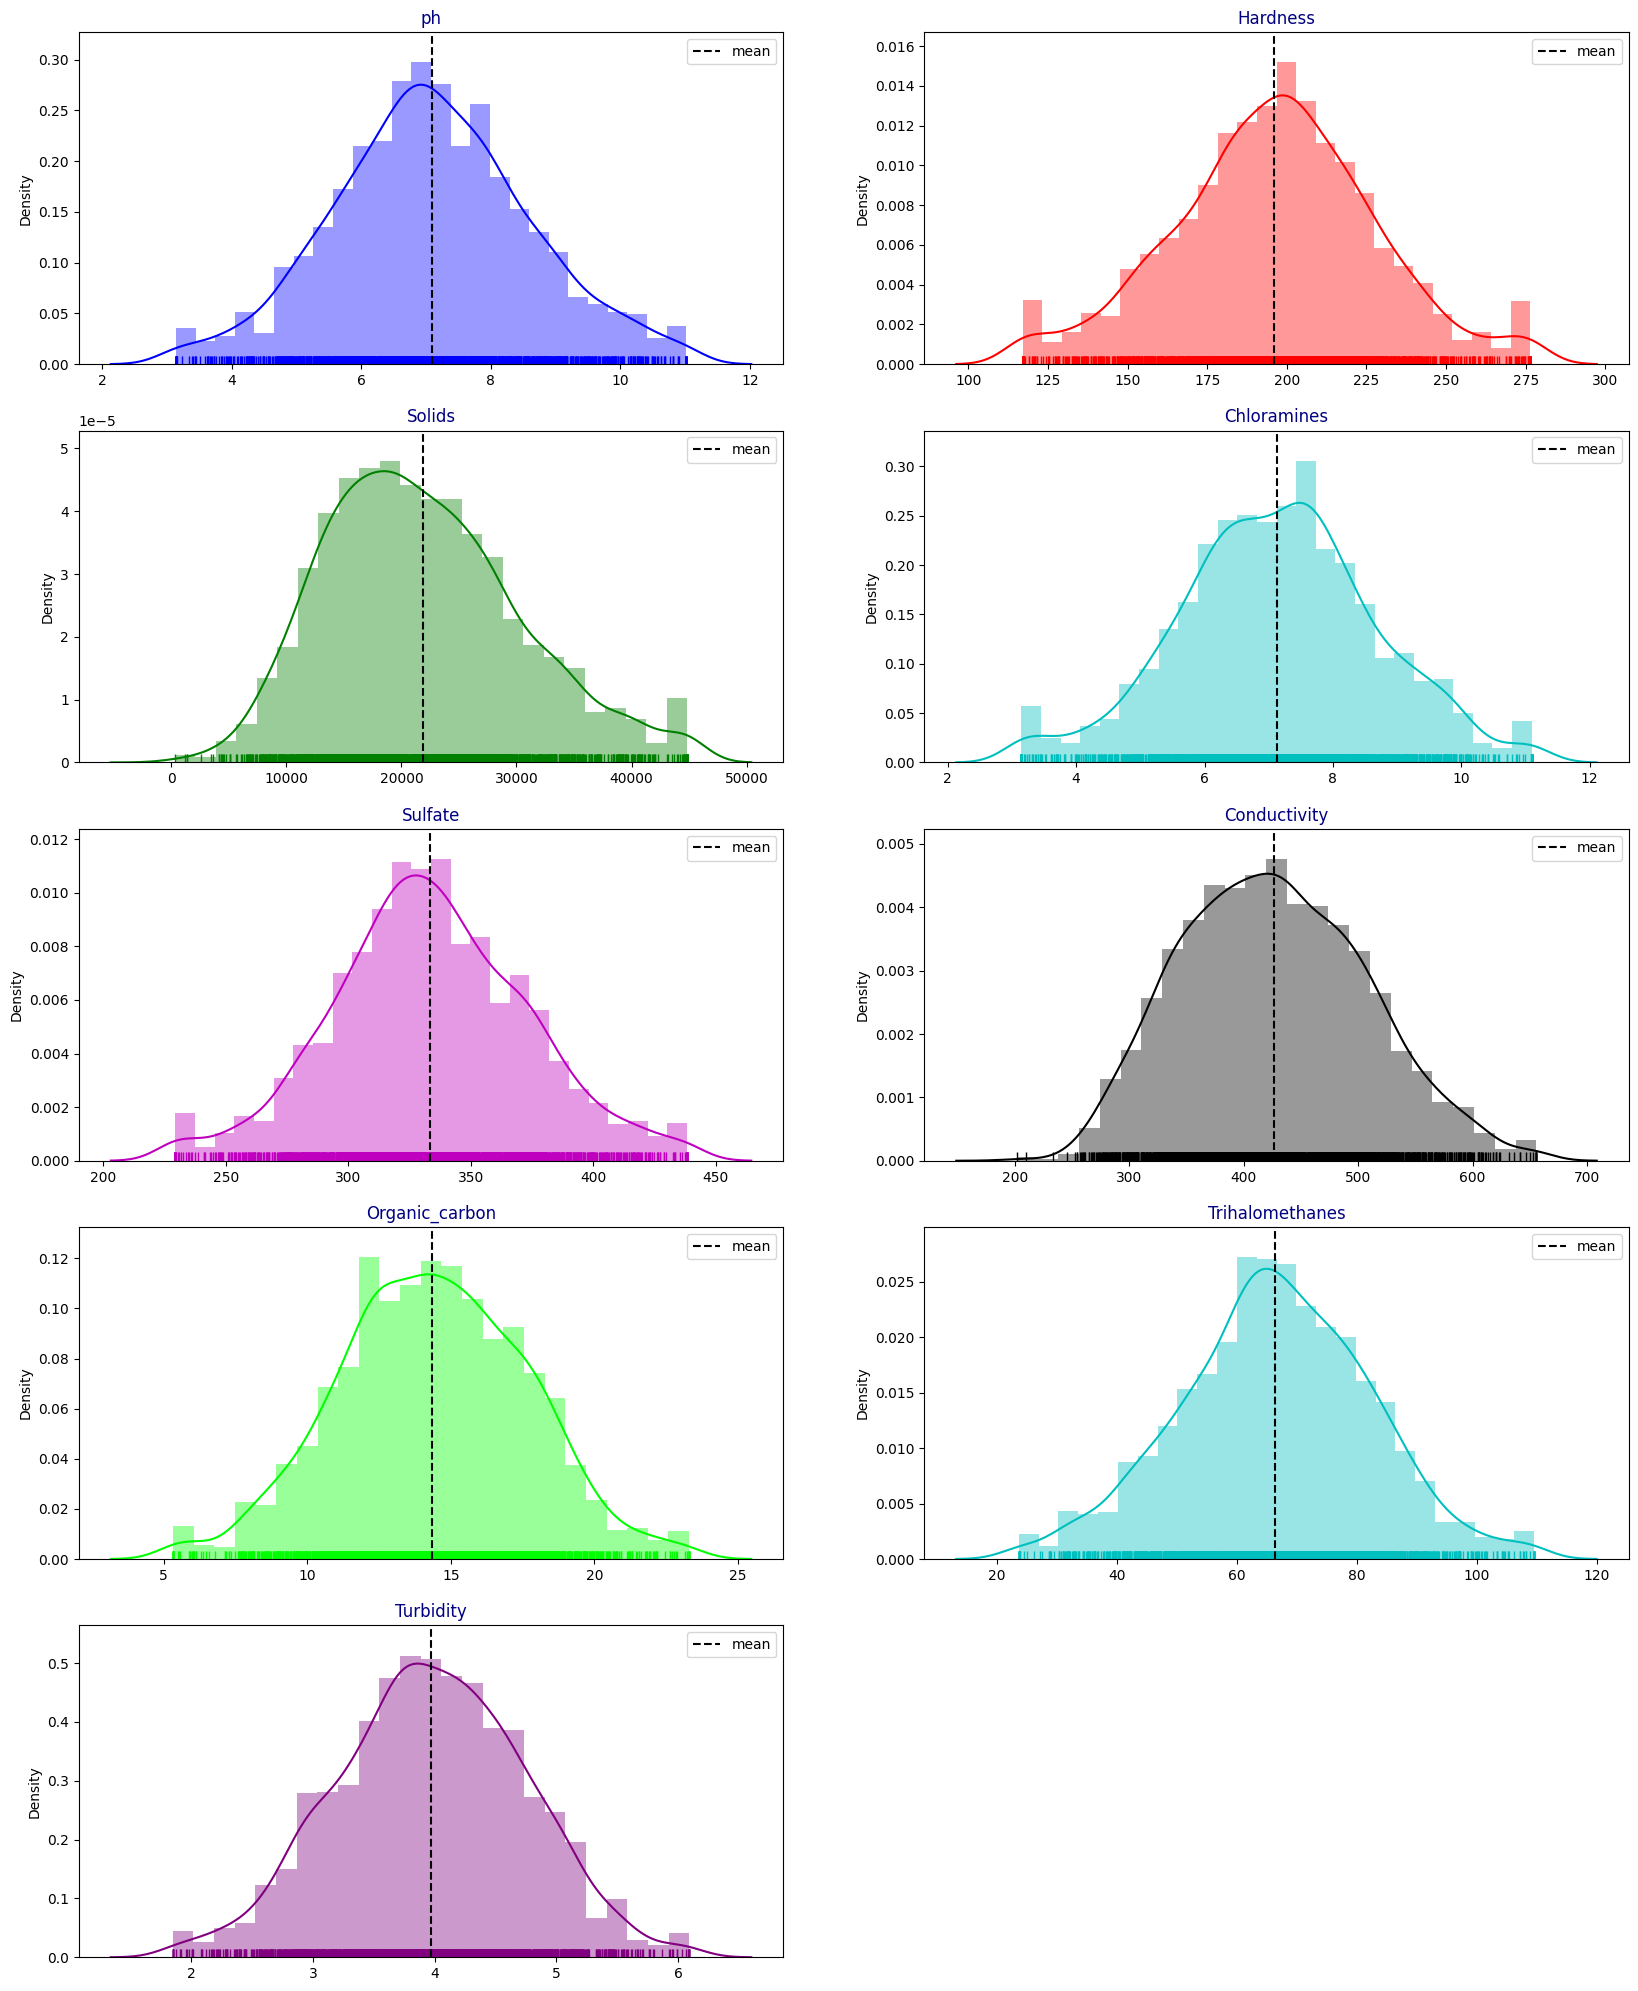

In [40]:
COLS_WITHOUT_TARGET = [c for c in concrete_df.columns if c != 'Potability']
length = len(COLS_WITHOUT_TARGET)
cs = ["b","r","g","c","m","k","lime","c", "purple"]
fig = plt.figure(figsize=(20, 25))

# Create a 5x2 subplot grid to fit 9 plots (with one empty spot)
for i, j, k in zip(COLS_WITHOUT_TARGET, range(length), cs):
    # Use 5x2 grid instead of 4x2 to avoid the "num must be <= 8" error
    plt.subplot(5, 2, j+1)
    ax = sns.distplot(concrete_df[i], color=k, rug=True)
    ax.set_facecolor("w")
    plt.axvline(concrete_df[i].mean(), linestyle="dashed", label="mean", color="k")
    plt.legend(loc="best")
    plt.title(i, color="navy")
    plt.xlabel("")
plt.show()

- ph: Slightly right skewed - No gaussian distribution
- Hardness: Slightly left skewed - No gaussian distribution
- Solids: Right skewed - No gaussian distribution
- Chloramines: Slightly left skewed - 2 gaussians distribution
- Sulfate: Slightly right skewed - No gaussian distribution
- Conductivity: Slightly right skewed - No gaussian distribution
- Organic_carbon: Slightly right skewed - No gaussian distribution
- Trihalomethanes: Slightly right skewed - No gaussian distribution

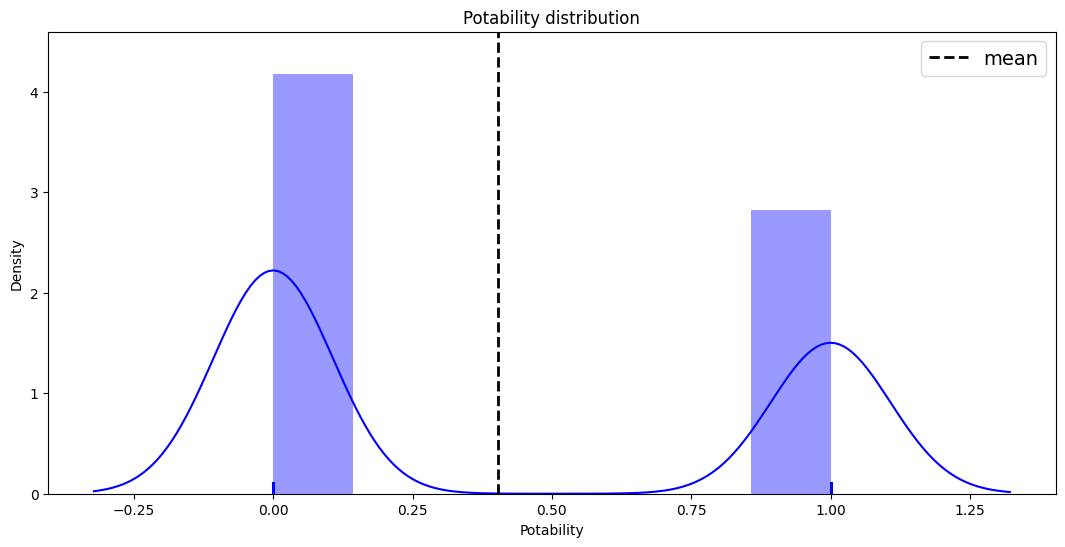

In [41]:
plt.figure(figsize=(13,6))
sns.distplot(concrete_df["Potability"],color="b",rug=True)
plt.axvline(concrete_df["Potability"].mean(), linestyle="dashed",color="k", label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Potability distribution")
plt.show()

- Potability: Both skewed, with a slight over to right skew distribution, has two gaussians

In [42]:
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2011.0000000,7.0870831,1.5341580,3.1396306,6.0897235,7.0272969,8.0529688,11.0155274
Hardness,2011.0000000,196.0591926,31.9130495,117.1251604,176.7449376,197.1918394,216.4410697,276.3928337
Solids,2011.0000000,21872.3341921,8503.0694517,320.9426113,15615.6653904,20933.5127497,27182.5870668,44831.8698731
Chloramines,2011.0000000,7.1318537,1.5475176,3.1462213,6.1388953,7.1439067,8.1097261,11.0960864
Sulfate,2011.0000000,333.3518091,40.1178020,229.3234890,307.6325115,332.2321775,359.3305546,438.3261792
Conductivity,2011.0000000,426.4186540,80.3618992,201.6197368,366.6803074,423.4559057,482.3731686,655.8791400
Organic_carbon,2011.0000000,14.3575872,3.3054206,5.3280260,12.1241049,14.3220189,16.6830493,23.2954269
Trihalomethanes,2011.0000000,66.4066699,15.9086187,23.6051297,55.9526639,66.5421980,77.2919254,109.5768788
Turbidity,2011.0000000,3.9695272,0.7759072,1.8487975,3.4429154,3.9681771,4.5141753,6.0912332
Potability,2011.0000000,0.4032819,0.4906785,0.0000000,0.0000000,0.0000000,1.0000000,1.0000000


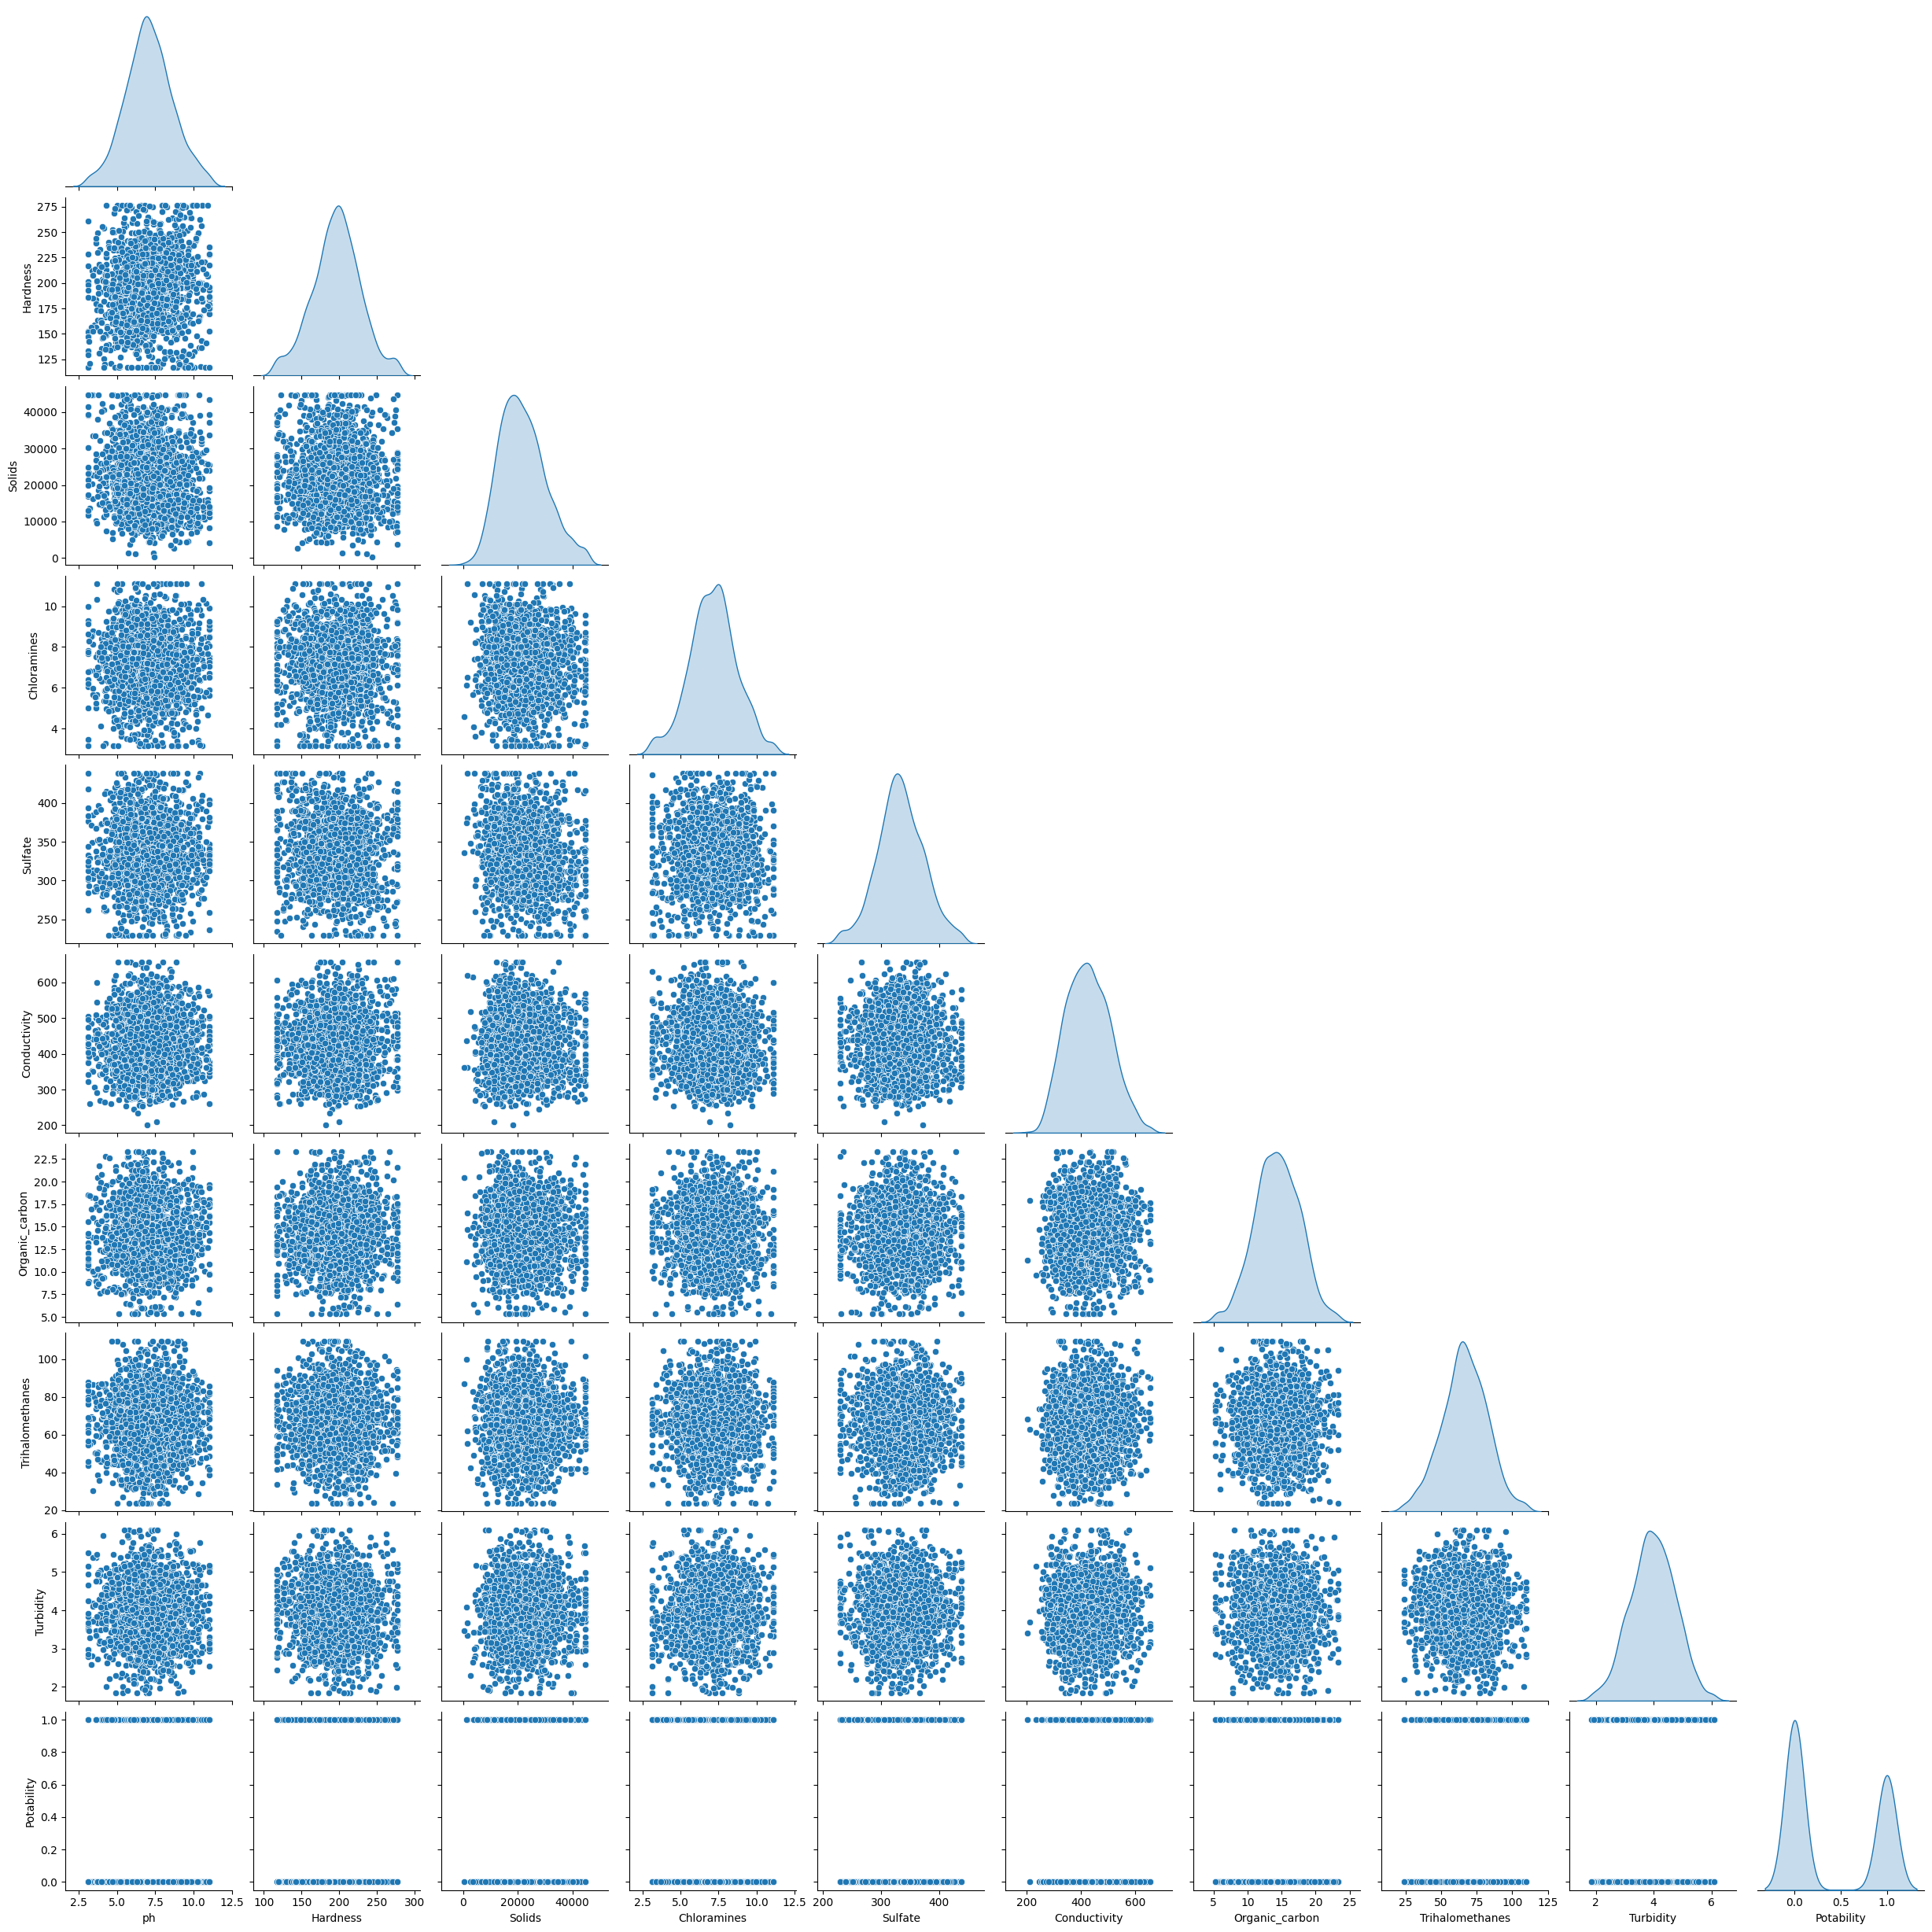

In [ ]:
sns.pairplot(concrete_df, diag_kind="kde", corner=True)
plt.show()


In [ ]:
concrete_df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.0000000,0.1144449,-0.0889628,-0.0297304,0.0110311,0.0138173,0.0253026,0.0166402,-0.0341789,0.0178429
Hardness,0.1144449,1.0000000,-0.0508933,-0.0229074,-0.1052914,0.0115518,0.0127603,-0.0167212,-0.0365286,0.0013395
Solids,-0.0889628,-0.0508933,1.0000000,-0.0523146,-0.1530914,-0.0060660,-0.0037905,-0.0173989,0.0213147,0.0389916
Chloramines,-0.0297304,-0.0229074,-0.0523146,1.0000000,0.0154986,-0.0294226,-0.0208642,0.0121837,0.0122149,0.0192288
Sulfate,0.0110311,-0.1052914,-0.1530914,0.0154986,1.0000000,-0.0140769,0.0225411,-0.0227503,-0.0075379,-0.0125053
Conductivity,0.0138173,0.0115518,-0.0060660,-0.0294226,-0.0140769,1.0000000,0.0153354,0.0047943,0.0127071,-0.0149935
Organic_carbon,0.0253026,0.0127603,-0.0037905,-0.0208642,0.0225411,0.0153354,1.0000000,-0.0050590,-0.0158913,-0.0147701
Trihalomethanes,0.0166402,-0.0167212,-0.0173989,0.0121837,-0.0227503,0.0047943,-0.0050590,1.0000000,-0.0208289,0.0089870
Turbidity,-0.0341789,-0.0365286,0.0213147,0.0122149,-0.0075379,0.0127071,-0.0158913,-0.0208289,1.0000000,0.0221693
Potability,0.0178429,0.0013395,0.0389916,0.0192288,-0.0125053,-0.0149935,-0.0147701,0.0089870,0.0221693,1.0000000


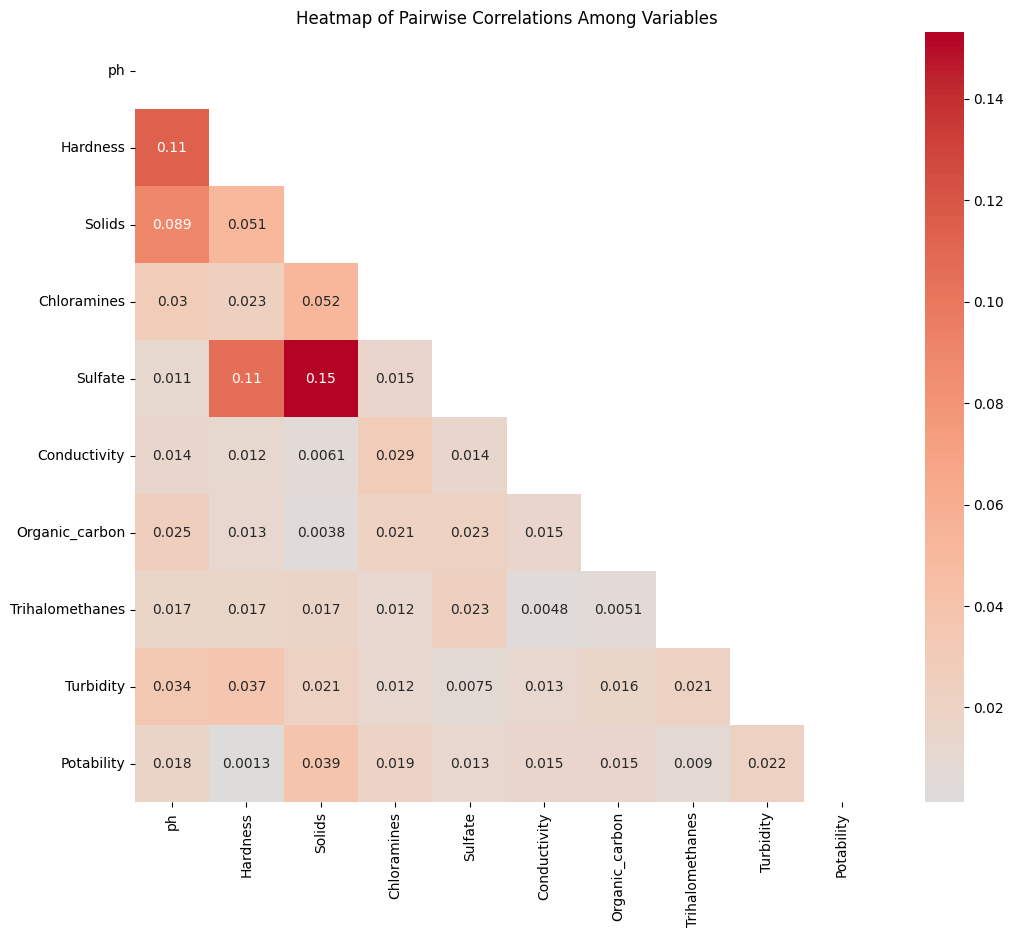

In [48]:
corr = abs(concrete_df.corr())

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm', center=0)
plt.title('Heatmap of Pairwise Correlations Among Variables')

plt.show()

- pH, Solids, Chloramines and Turbidity has enough relationship with the 'Potability' variable
- Organic_carbon and pH has a low positive correlation with each other => New feature: Organic_carbon_oh
- Chloramines and hardness has a low positive correlation with each other => New feature: chloramines_hardness
- Trihalomethanes and solids has a low positive correlation with each other => New feature: trihalomethanes_solids